In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib_inline.backend_inline import set_matplotlib_formats
from sklearn.decomposition import LatentDirichletAllocation, NMF, PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from wordcloud import WordCloud



set_matplotlib_formats("retina")

In [11]:
data = pd.read_csv("data.csv")
data


,name,program_url,easy_read_url,program_text,easy_read_text
0,Madame Nathalie ARTHAUD,https://www.cnccep.fr/pdfs/Candidat-01-Nathali...,https://www.cnccep.fr/pdfs/Candidat-01-Nathali...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
1,Monsieur Nicolas DUPONT-AIGNAN,https://www.cnccep.fr/pdfs/Candidat-02-Nicolas...,https://www.cnccep.fr/pdfs/Candidat-02-Nicolas...,\n\n un hoMMe ...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
2,Madame Anne HIDALGO,https://www.cnccep.fr/pdfs/Candidat-03-Anne-Hi...,https://www.cnccep.fr/pdfs/Candidat-03-Anne-Hi...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\n\n\n\n ...
3,Monsieur Yannick JADOT,https://www.cnccep.fr/pdfs/Candidat-04-Yannick...,https://www.cnccep.fr/pdfs/Candidat-04-Yannick...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
4,Monsieur Jean LASSALLE,https://www.cnccep.fr/pdfs/Candidat-05-Jean-La...,https://www.cnccep.fr/pdfs/Candidat-05-Jean-La...,\n\n L A F R A N C E ...,\n\n\n\n La France authen...
5,Madame Marine LE PEN,https://www.cnccep.fr/pdfs/Candidat-06-Marine-...,https://www.cnccep.fr/pdfs/Candidat-06-Marine-...,"\n\n\n\n\n\n\n\n\n\n\n\n Madame, Mon...","\n\n\n\n Madame, Monsieur,\n ..."
6,Monsieur Emmanuel MACRON,https://www.cnccep.fr/pdfs/Candidat-07-Emmanue...,https://www.cnccep.fr/pdfs/Candidat-07-Emmanue...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\n\n\n\n Ce document a é...
7,Monsieur Jean-Luc MELENCHON,https://www.cnccep.fr/pdfs/Candidat-08-Jean-Lu...,https://www.cnccep.fr/pdfs/Candidat-08-Jean-Lu...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
8,Madame Valerie PECRESSE,https://www.cnccep.fr/pdfs/Candidat-09-Valerie...,https://www.cnccep.fr/pdfs/Candidat-09-Valerie...,\n\n ÉLECTION PRÉSIDE...,\n\n ÉLECTION PRÉSIDENTIELLE / LE DIMAN...
9,Monsieur Philippe POUTOU,https://www.cnccep.fr/pdfs/Candidat-10-Philipp...,https://www.cnccep.fr/pdfs/Candidat-10-Philipp...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\n ...


In [3]:
# Vectorisation 

names = data["name"]

name_tokens = list(set(re.split(" |-", " ".join(names).lower())))
stop_words = [
    "000", "001", "044", "063", "093", "00139", "00296voi",
    "la", "le", "les", "ce", "ma",
    "je", "il", "elle", "nous", "vous", "ils", "elles",
    "ai", "ont", "est", "etre", "ete", "sera", "serai", "seront", "suis", "sont",
    "nos", "notre", "votre", "sa", "son",
    "de", "du", "des", "et", "en", "un", "une", "ans", "au", "aux", "se", "me", "ne", "ni", "ou",
    "qu", "que", "qui", "rai",
    "pas", "par", "pour", "dans", "dont", "sur", "avec", "contre", "mais", "plus", "jusqu",
    "france", "francais",
    *name_tokens,
]

vectorizer = TfidfVectorizer(strip_accents="unicode", lowercase=True, stop_words=stop_words)
vec_program = vectorizer.fit_transform(data["program_text"])
vec_feature_names = vectorizer.get_feature_names_out()

pd.DataFrame(vec_feature_names)

,0
0,01
1,02
2,03
3,04
4,05
...,...
3546,zones
3547,œuvrant
3548,œuvre
3549,œuvrer


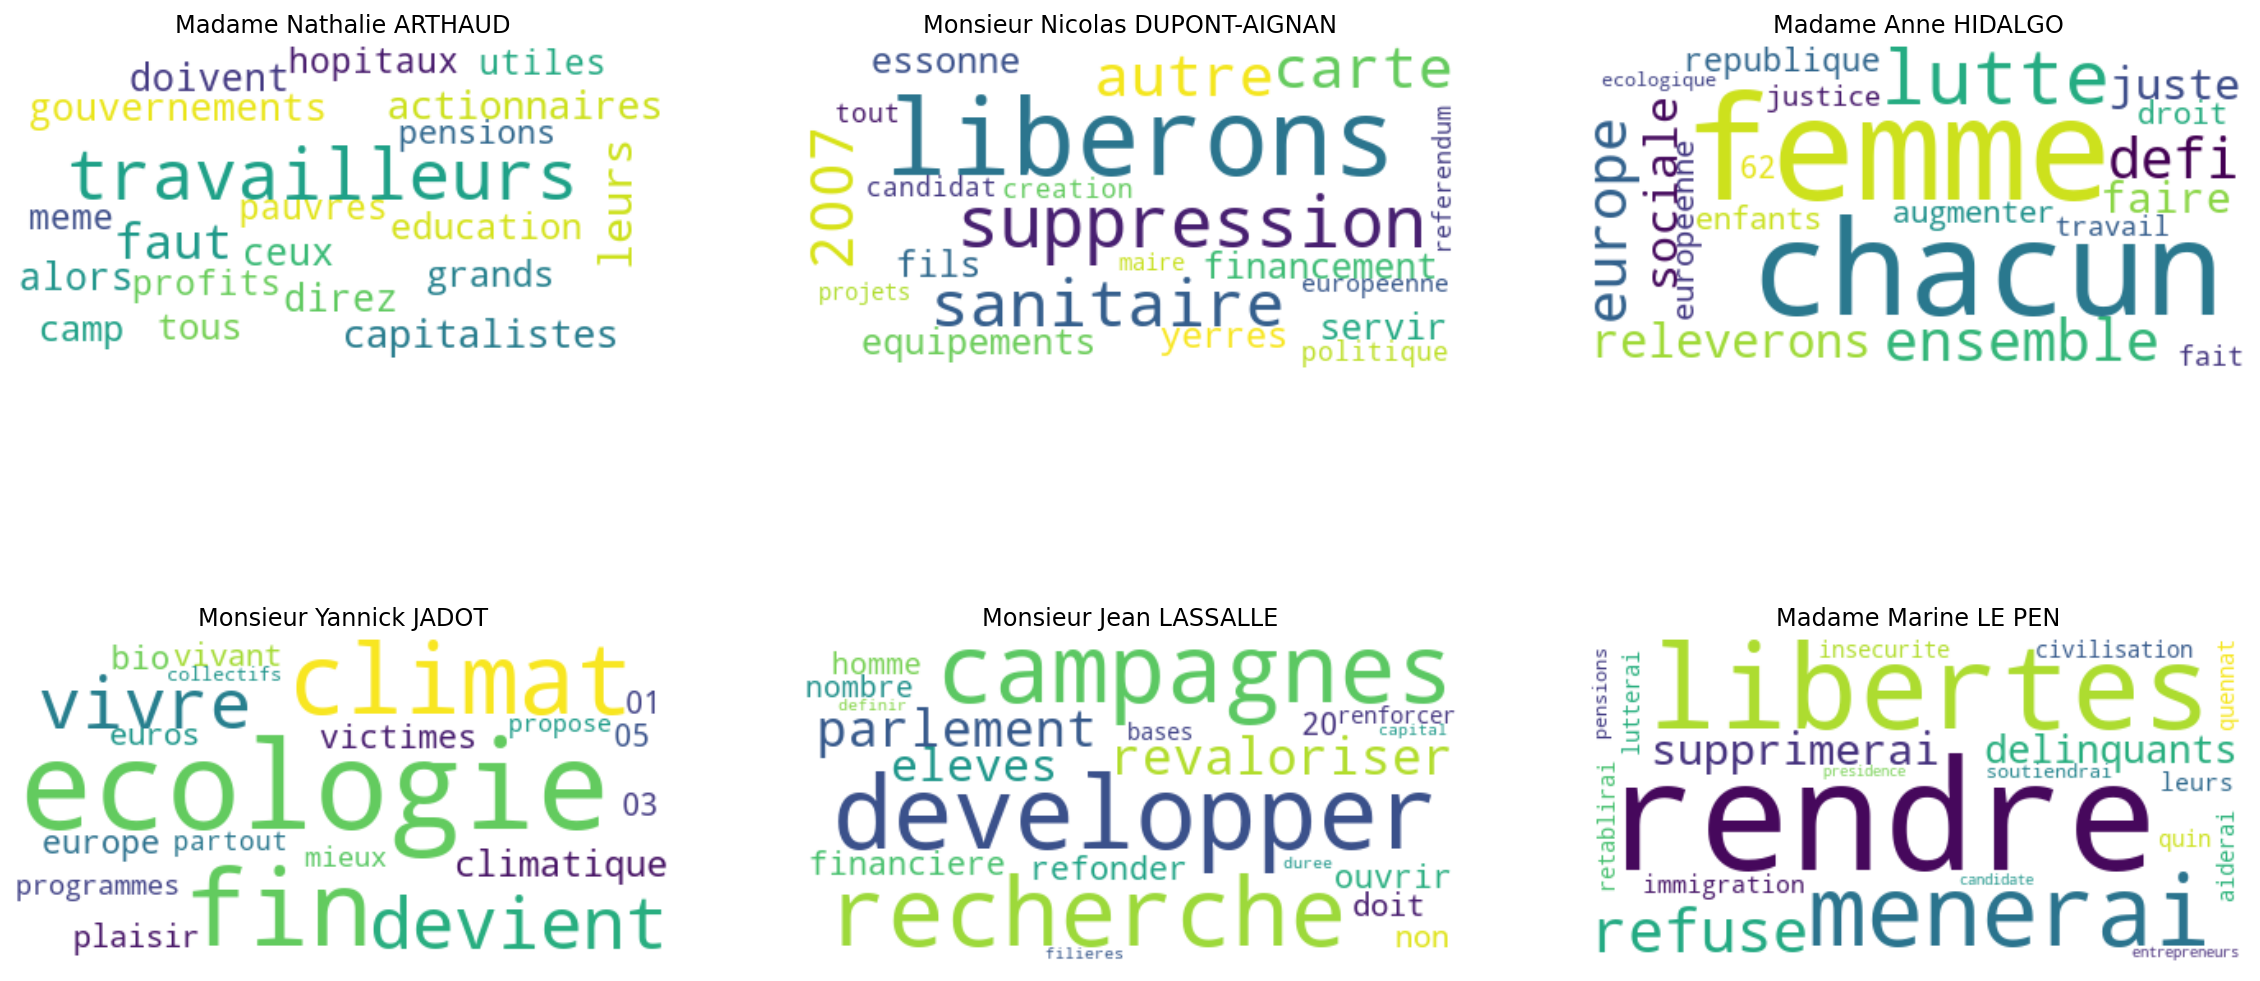

In [5]:
# vue globale des programmes de chaque candidat

def plot_wordclouds(data, names, n_top_words=20):
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    for i, (name, ax) in enumerate(zip(names, axes.flatten())):
        wc = WordCloud(background_color="white", max_words=n_top_words)
        wc.generate_from_frequencies(dict(zip(vec_feature_names, data[i])))
        ax.imshow(wc, interpolation="bilinear")
        ax.set_title(name)
        ax.axis("off")
    plt.show()

plot_wordclouds(vec_program.toarray(), names)

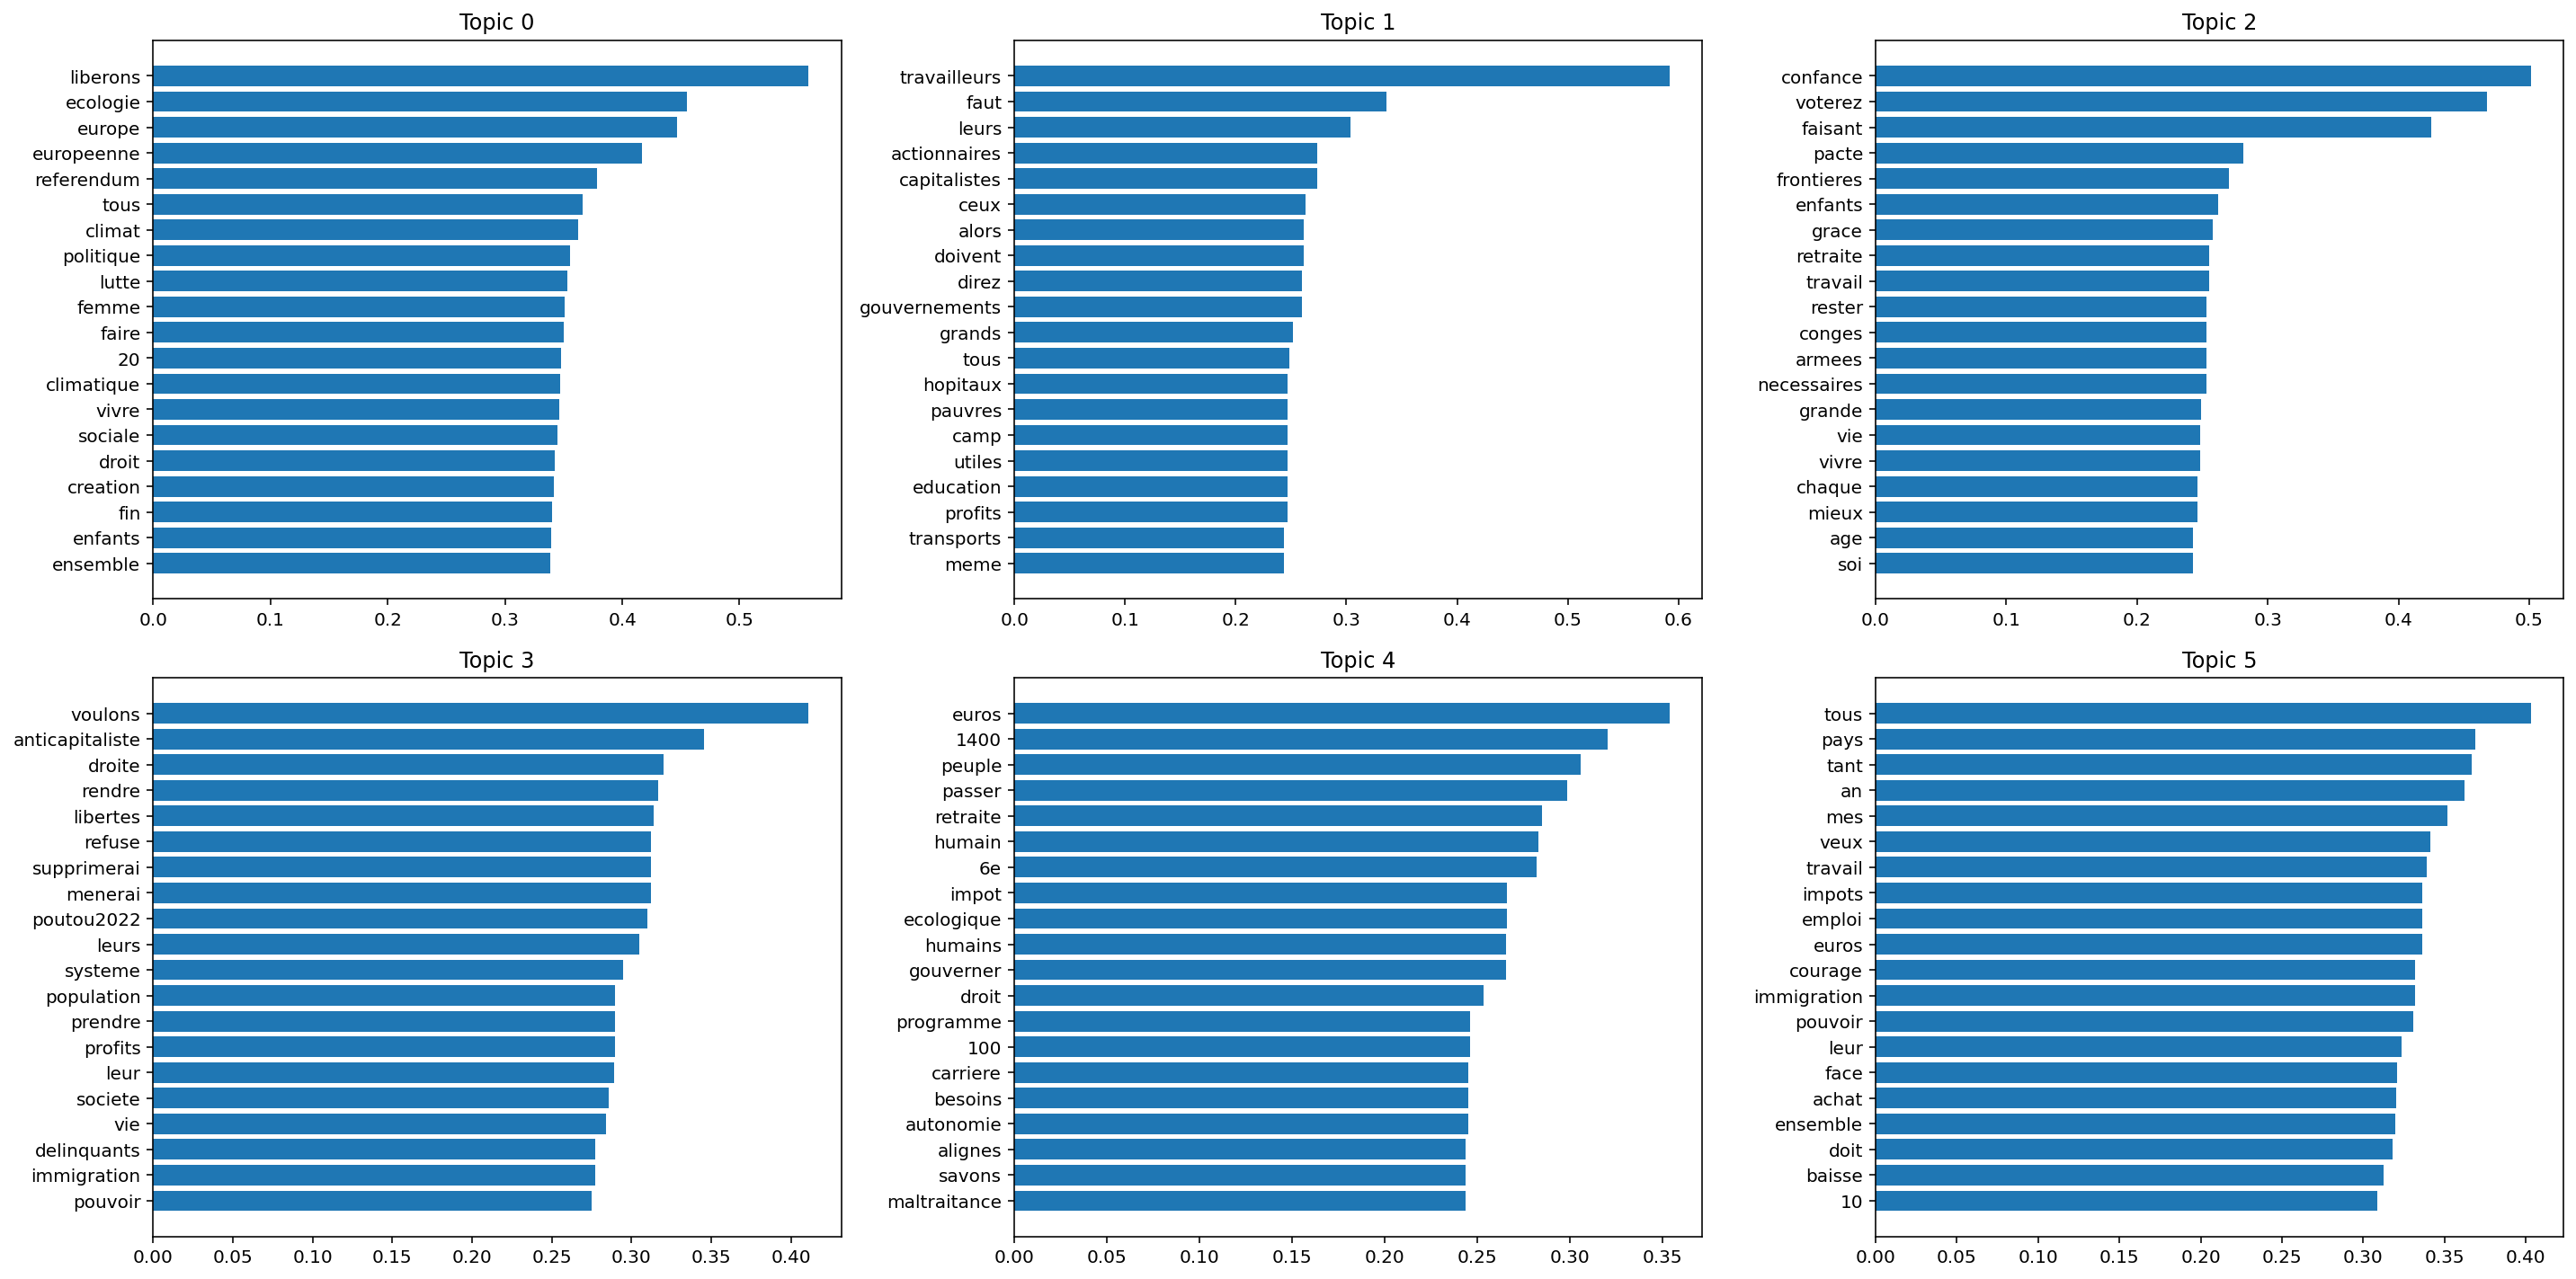

In [8]:
# Les termes prépondérants dans ces programmes

def plot_top_words(model, feature_names, n_top_words=20):
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    for i, (topic, ax) in enumerate(zip(model.components_, axes.flatten())):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        top_features_val = topic[top_features_ind]
        ax.barh(top_features, top_features_val)
        ax.set_title(f"Topic {i}")
        ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

# LDA

lda = LatentDirichletAllocation(n_components=6, random_state=0)
lda.fit(vec_program)
plot_top_words(lda, vec_feature_names)


In [10]:

# plus proches voisins de chaucun des candidats

nbrs = NearestNeighbors(n_neighbors=6, algorithm="ball_tree").fit(vec_program)
distances, indices = nbrs.kneighbors(vec_program)

for i, name in enumerate(names):
    print(f"Plus proches voisins de {name}:")
    for j in indices[i]:
        print(f"\t- {names[j]}")
    print()







Plus proches voisins de Madame Nathalie ARTHAUD:
	- Madame Nathalie ARTHAUD
	- Monsieur Philippe POUTOU
	- Monsieur Fabien ROUSSEL
	- Madame Anne HIDALGO
	- Monsieur Jean-Luc MELENCHON
	- Madame Valerie PECRESSE

Plus proches voisins de Monsieur Nicolas DUPONT-AIGNAN:
	- Monsieur Nicolas DUPONT-AIGNAN
	- Monsieur Eric ZEMMOUR
	- Madame Valerie PECRESSE
	- Madame Anne HIDALGO
	- Monsieur Fabien ROUSSEL
	- Monsieur Jean LASSALLE

Plus proches voisins de Madame Anne HIDALGO:
	- Madame Anne HIDALGO
	- Monsieur Fabien ROUSSEL
	- Monsieur Jean-Luc MELENCHON
	- Monsieur Yannick JADOT
	- Madame Valerie PECRESSE
	- Monsieur Emmanuel MACRON

Plus proches voisins de Monsieur Yannick JADOT:
	- Monsieur Yannick JADOT
	- Monsieur Fabien ROUSSEL
	- Madame Anne HIDALGO
	- Madame Valerie PECRESSE
	- Monsieur Jean-Luc MELENCHON
	- Monsieur Philippe POUTOU

Plus proches voisins de Monsieur Jean LASSALLE:
	- Monsieur Jean LASSALLE
	- Madame Anne HIDALGO
	- Madame Valerie PECRESSE
	- Monsieur Fabien ROUSSE

c:\Users\chams\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_base.py:513: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


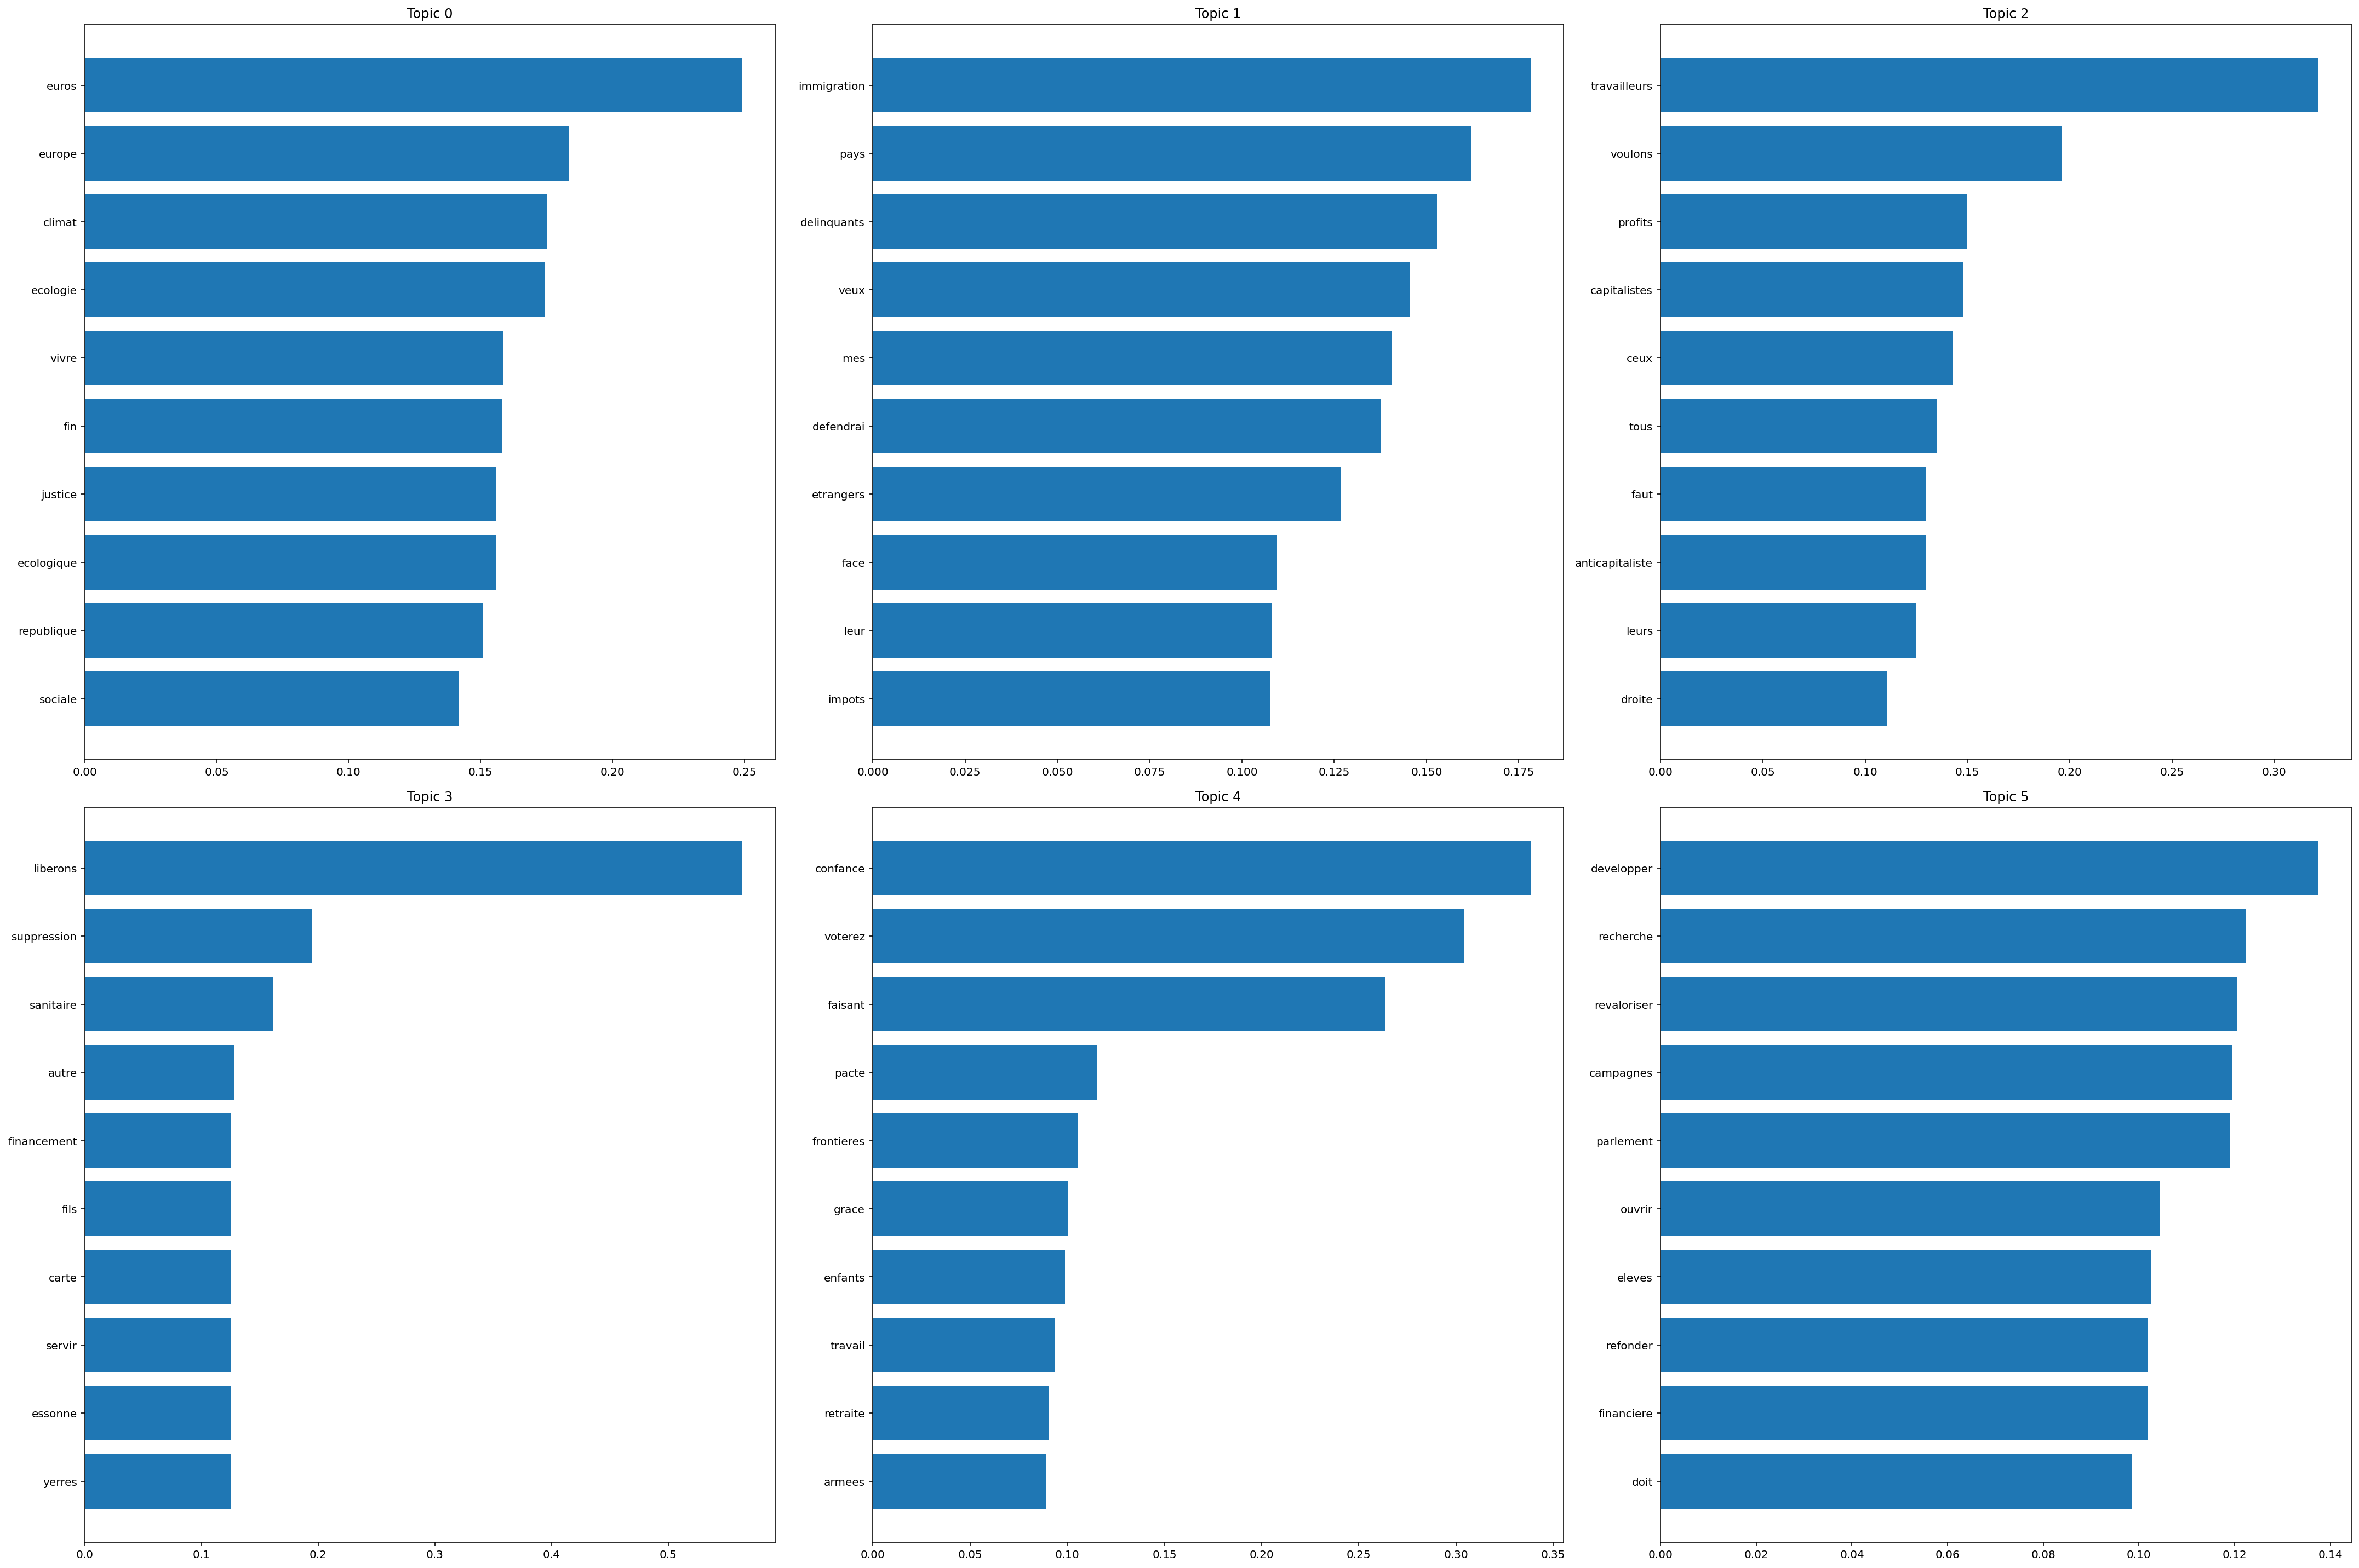

In [18]:
# theme principaux

def plot_top_words(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2, 3, figsize=(30, 20))
    for i, (topic, ax) in enumerate(zip(model.components_, axes.flatten())):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        top_features_val = topic[top_features_ind]
        ax.barh(top_features, top_features_val)
        ax.set_title(f"Topic {i}")
        ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

# NMF

nmf = NMF(n_components=6, random_state=0)
nmf.fit(vec_program)
plot_top_words(nmf, vec_feature_names)



In [20]:
nmf = NMF(n_components=5, init="nndsvda").fit(vec_program.toarray())
for i in range(nmf.n_components):
    print(f"Thème {i}:", vec_feature_names[np.argpartition(nmf.components_[i], -5)[-5:]])

Thème 0: ['vivre' 'climat' 'ecologie' 'europe' 'euros']
Thème 1: ['mes' 'veux' 'delinquants' 'pays' 'immigration']
Thème 2: ['ceux' 'capitalistes' 'profits' 'voulons' 'travailleurs']
Thème 3: ['europeenne' '20' 'liberons' 'suppression' 'politique']
Thème 4: ['frontieres' 'voterez' 'confance' 'faisant' 'pacte']


In [23]:
lda = LatentDirichletAllocation(n_components=5).fit(vec_program.toarray())
for i in range(lda.n_components):
    print(f"Thème {i}:", vec_feature_names[np.argpartition(lda.components_[i], -5)[-5:]])

Thème 0: ['capitalistes' 'actionnaires' 'leurs' 'travailleurs' 'faut']
Thème 1: ['revaloriser' 'climat' 'pays' 'fin' 'ecologie']
Thème 2: ['voulons' 'confance' 'voterez' 'liberons' 'tous']
Thème 3: ['chacun' 'europe' 'tous' 'femme' 'ensemble']
Thème 4: ['retraite' 'passer' 'euros' 'peuple' '1400']


In [24]:
df_corr = pd.DataFrame(vec_program.toarray().T, columns=names).corr().abs()
df_corr.style.background_gradient(cmap="viridis").format(precision=2)


name,Madame Nathalie ARTHAUD,Monsieur Nicolas DUPONT-AIGNAN,Madame Anne HIDALGO,Monsieur Yannick JADOT,Monsieur Jean LASSALLE,Madame Marine LE PEN,Monsieur Emmanuel MACRON,Monsieur Jean-Luc MELENCHON,Madame Valerie PECRESSE,Monsieur Philippe POUTOU,Monsieur Fabien ROUSSEL,Monsieur Eric ZEMMOUR
name,,,,,,,,,,,,
Madame Nathalie ARTHAUD,1.00,0.04,0.04,0.01,0.03,0.00,0.01,0.02,0.01,0.09,0.09,0.01
Monsieur Nicolas DUPONT-AIGNAN,0.04,1.00,0.02,0.00,0.01,0.02,0.00,0.01,0.03,0.02,0.03,0.02
Madame Anne HIDALGO,0.04,0.02,1.00,0.12,0.04,0.07,0.09,0.11,0.07,0.05,0.15,0.02
Monsieur Yannick JADOT,0.01,0.00,0.12,1.00,0.01,0.01,0.04,0.07,0.07,0.06,0.15,0.03
Monsieur Jean LASSALLE,0.03,0.01,0.04,0.01,1.00,0.00,0.01,0.01,0.02,0.01,0.03,0.04
Madame Marine LE PEN,0.00,0.02,0.07,0.01,0.00,1.00,0.01,0.03,0.05,0.02,0.04,0.06
Monsieur Emmanuel MACRON,0.01,0.00,0.09,0.04,0.01,0.01,1.00,0.04,0.05,0.01,0.06,0.00
Monsieur Jean-Luc MELENCHON,0.02,0.01,0.11,0.07,0.01,0.03,0.04,1.00,0.01,0.07,0.13,0.00
Madame Valerie PECRESSE,0.01,0.03,0.07,0.07,0.02,0.05,0.05,0.01,1.00,0.02,0.08,0.05


In [28]:
#candidat le plus proche du theme choisit

def get_closest_candidate(topic, model, feature_names, n_top_words=10):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    top_features_val = topic[top_features_ind]
    return names[model.transform(vectorizer.transform([" ".join(top_features)])).argmax()]

get_closest_candidate(nmf.components_[0], nmf, vec_feature_names)



'Madame Nathalie ARTHAUD'

In [39]:
# fonction qui retourne le candidat le plus proche du theme choisi

def get_nearest_theme(theme):
    vec = TfidfVectorizer(strip_accents="unicode", lowercase=True, stop_words=stop_words)
    vec.fit(data["program_text"])
    vec_theme = vec.transform([theme])
    nbrs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(vec_program.toarray())
    distances, indices = nbrs.kneighbors(vec_theme.toarray())
    return data.iloc[indices[0][0]]["name"]

get_nearest_theme("SMIC")





'Monsieur Jean-Luc MELENCHON'

In [40]:
# fonction qui rassemble les candidats les plus proches du theme choisi

def get_nearest_candidates(theme, n_candidates=5):
    vec = TfidfVectorizer(strip_accents="unicode", lowercase=True, stop_words=stop_words)
    vec.fit(data["program_text"])
    vec_theme = vec.transform([theme])
    nbrs = NearestNeighbors(n_neighbors=n_candidates, algorithm="ball_tree").fit(vec_program.toarray())
    distances, indices = nbrs.kneighbors(vec_theme.toarray())
    return data.iloc[indices[0]]["name"]

get_nearest_candidates("SMIC")


7     Monsieur Jean-Luc MELENCHON
9        Monsieur Philippe POUTOU
2             Madame Anne HIDALGO
3          Monsieur Yannick JADOT
10        Monsieur Fabien ROUSSEL
Name: name, dtype: object